# Exploratory Data Analysis of Nutrient Data from the Chesapeake Bay program

* The goal of this analysis is to know the climatological distribution of nutrient in the Lafayette River and Elizabeth River to show nutrient pulses is a pervasive pattern in the shallow river system in the lower Chesapeake Bay.
* Please refer to this website to download data https://datahub.chesapeakebay.net/WaterQuality  and choose monitoring stations LFA01 and LFA02 (in the Lafayette River), LE5.6 and ELD01 (in the Elizabeth River)
* Time duration: 1990-2022 (for station LFA01, LFA02, and ELD01); 1984-2022 for station LE5.6
* Only summer months (Jun-Sep) were plotted
* Both NH4 and NO3 have huge standard deviations around  the climatological mean


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import os

In [2]:
# import data
infile = '../data/external/WaterQuality_at_WaterQualityStation_CPB.csv'
data = pd.read_csv(infile,usecols= ['Station', 'DateTime', 'TotalDepth', 'Depth', 'Layer','Parameter','MeasureValue'], parse_dates=['DateTime'], infer_datetime_format=True, sep = ',')

In [3]:
data_LFA01 = data[data['Station'] == 'LFA01']
data_btm = data_LFA01[(data_LFA01['Layer'] == 'B ')]
# extract rows corresponding to June, July, August, and September
data_btm = data_btm[(data_btm['DateTime'].dt.month >= 6) & (data_btm['DateTime'].dt.month <= 9)]
NH4_btm = data_btm[data_btm['Parameter'] == 'NH4F']
NO3_btm = data_btm[data_btm['Parameter'] == 'NO23F']
TSS_btm = data_btm[data_btm['Parameter'] == 'TSS'] # TSS means Total Suspend Sediment
NH4_btm  = NH4_btm.sort_values(by='DateTime')
NO3_btm  = NO3_btm.sort_values(by='DateTime')
TSS_btm  = TSS_btm.sort_values(by='DateTime')

#### Calculate the climatological mean and standard deviation over the past 25 years

In [4]:
# the unit of nutrient is mg N/L so it needs to be converted to umol/L
mean_NH4_btm = 71.394* NH4_btm['MeasureValue'].mean()
std_NH4_btm = 71.394* NH4_btm['MeasureValue'].std()
print('The average of bottom NH4 concentration at LFA01 over last 25 years was:', mean_NH4_btm)
print('The std was:', std_NH4_btm)
print('The mean+1*SD was:', mean_NH4_btm+std_NH4_btm)

The average of bottom NH4 concentration at LFA01 over last 25 years was: 4.074015063829788
The std was: 3.8326027709523722
The mean+1*SD was: 7.9066178347821605


In [5]:
mean_NO3_btm = 71.394* NO3_btm['MeasureValue'].mean()
std_NO3_btm = 71.394* NO3_btm['MeasureValue'].std()
print('The average of bottom NO3 concentration at LFA01 over last 25 years was:', mean_NO3_btm)
print('The std was:', std_NO3_btm)
print('The mean+1*SD was:', mean_NO3_btm+std_NO3_btm)

The average of bottom NO3 concentration at LFA01 over last 25 years was: 4.258142142857143
The std was: 5.117975378149033
The mean+1*SD was: 9.376117521006176


* Conclusion: both NH4 and NO3 have huge standard deviations, is it good to use the climatological mean?

### Plot Station LFA01, total depth is ~ 5 m

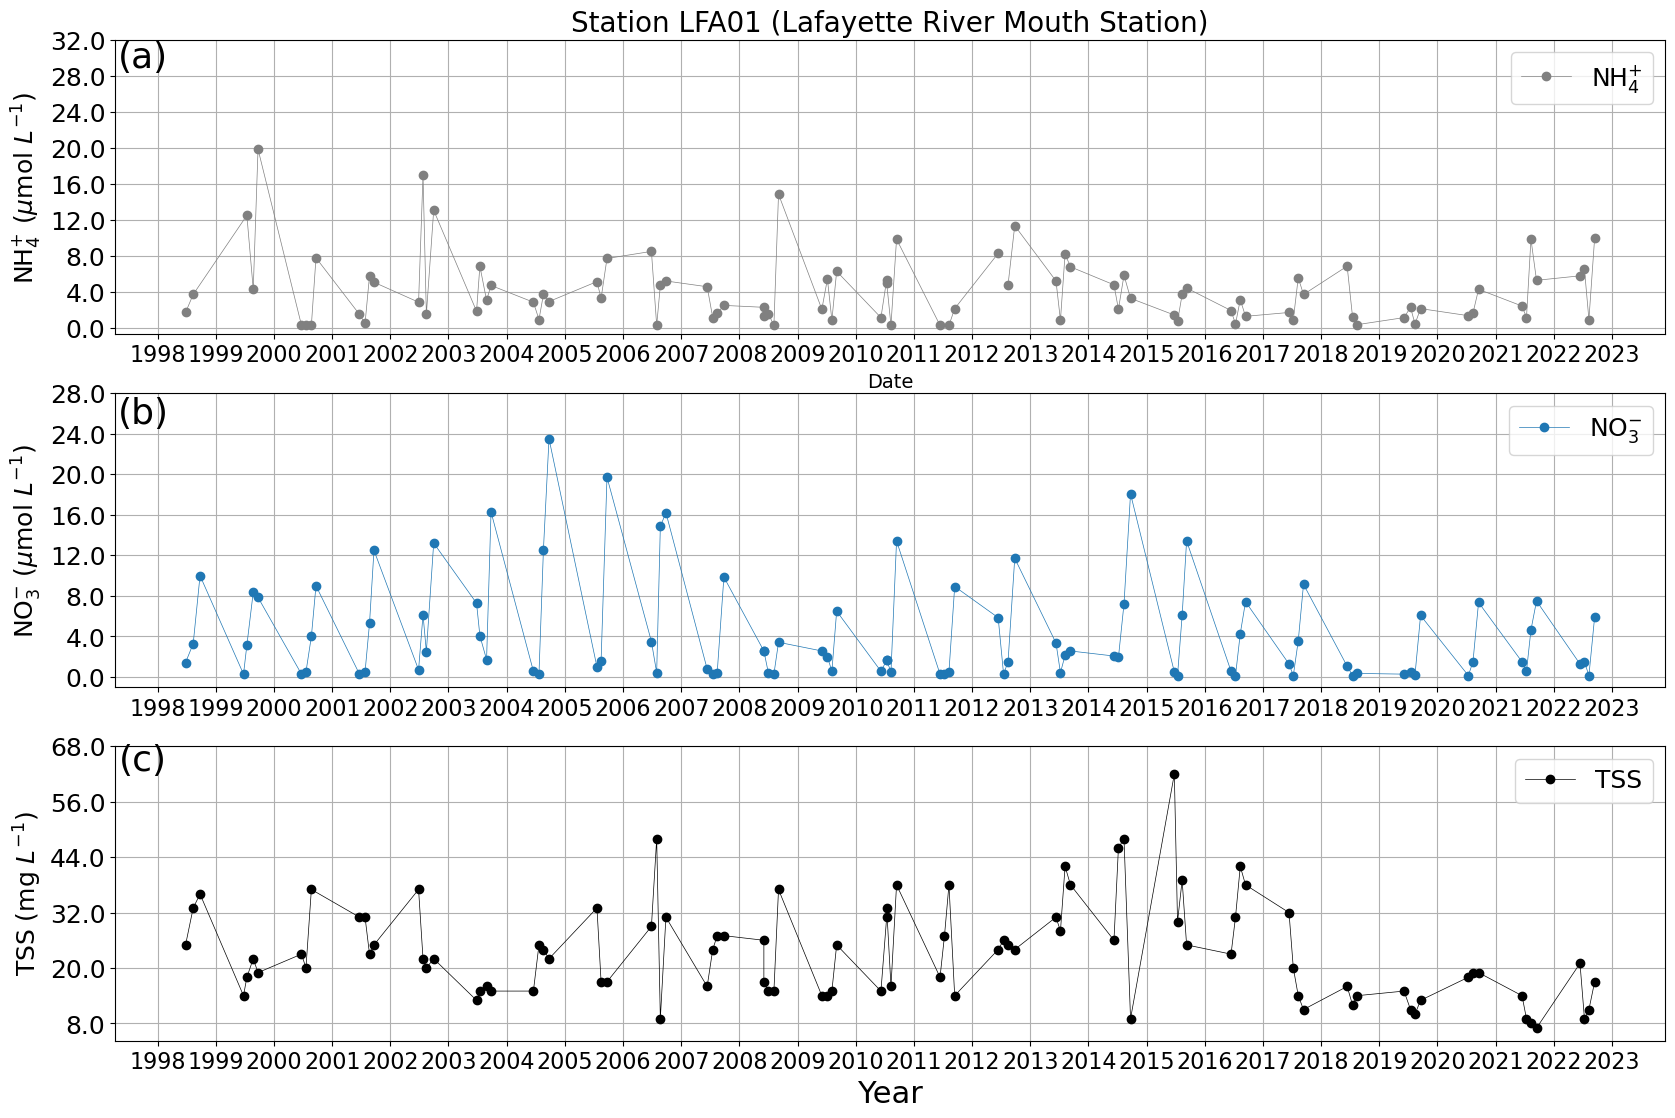

In [6]:
# plot time series data for each variable in a subplot
fig, axes = plt.subplots(3, 1, figsize=(20, 13))
# the unit of nutrient is mg N/L so it needs to be converted to umol/L
axes[0].plot(NH4_btm['DateTime'], NH4_btm['MeasureValue']*71.394, marker ='o', markersize = 6, linestyle='-', linewidth=0.5, color='grey',label ='NH$_4^{+}$')
axes[0].set_ylabel('NH$_4^{+}$ ($\mu$mol $L^{-1}$)',fontsize=18)
y_ticks = np.arange(0, 32.5, 4)
y_tick_labels = ['{:.1f}'.format(t) for t in y_ticks]
axes[0].set_yticks(y_ticks, y_tick_labels, fontsize = 18 )
date_fmt = mdates.DateFormatter('%Y')
axes[0].xaxis.set_major_formatter(date_fmt)
axes[0].xaxis.set_minor_formatter(date_fmt)

year_locator = mdates.YearLocator()
month_locator = mdates.MonthLocator()

axes[0].xaxis.set_major_locator(year_locator)
#axes[0].xaxis.set_minor_locator(month_locator)
# Set the tick parameters for both the major ticks
plt.setp(axes[0].get_xticklabels(which='major'), rotation=0, ha='center', fontsize=16)
axes[0].text(mdates.date2num(datetime(1997, 10, 1)), 30, "(a)", fontsize=26, ha="center", va="center")
axes[0].set_xlabel('Date',fontsize=14)
axes[0].grid(True)
axes[0].legend(fontsize=18)
axes[0].set_title('Station LFA01 (Lafayette River Mouth Station)',fontsize=20)

axes[1].plot(NO3_btm['DateTime'], NO3_btm['MeasureValue']*71.394, marker ='o', markersize = 6, linestyle='-', linewidth=0.5,  label='NO$_3^{-}$')
axes[1].set_ylabel('NO$_3^{-}$ ($\mu$mol $L^{-1}$)',fontsize=18)
y_ticks = np.arange(0, 28.1, 4)
y_tick_labels = ['{:.1f}'.format(t) for t in y_ticks]
axes[1].set_yticks(y_ticks, y_tick_labels, fontsize = 18 )
axes[1].xaxis.set_major_formatter(date_fmt)
axes[1].xaxis.set_major_locator(year_locator)
# axes[1].set_xlabel('Date',fontsize=22)
plt.setp(axes[1].get_xticklabels(which='major'), rotation=0, ha='center', fontsize=16)
axes[1].text(mdates.date2num(datetime(1997, 10, 1)), 26, "(b)", fontsize=26, ha="center", va="center")
axes[1].grid(True)
axes[1].legend(fontsize=18)

axes[2].plot(TSS_btm['DateTime'], TSS_btm['MeasureValue'], marker ='o', markersize = 6, linestyle='-', linewidth=0.5, color='black', label='TSS')
axes[2].set_xlabel('Year',fontsize=22)
axes[2].set_ylabel('TSS (mg $L^{-1}$)',fontsize=18)
y_ticks = np.arange(8, 80, 12)
y_tick_labels = ['{:.1f}'.format(t) for t in y_ticks]
axes[2].set_yticks(y_ticks, y_tick_labels, fontsize = 18 )
axes[2].xaxis.set_major_formatter(date_fmt)
axes[2].xaxis.set_major_locator(year_locator)
plt.setp(axes[2].get_xticklabels(which='major'), rotation=0, ha='center', fontsize=16)
axes[2].text(mdates.date2num(datetime(1997, 10, 1)), 65, "(c)", fontsize=26, ha="center", va="center")
axes[2].grid(True)
axes[2].legend(fontsize=18)

# show plot
plt.show()
# Set the directory where the figure will be saved
save_dir = "../figures/"
fig.savefig(os.path.join(save_dir, 'LAF01_Nutrient_TSS_bottom.png'), dpi = 300)

### Plot Station LFB01, total depth is ~4 m

In [7]:
data_LFB01 = data[data['Station'] == 'LFB01']
data_btm = data_LFB01[(data_LFB01['Layer'] == 'B ')]
# extract rows corresponding to June, July, August, and September
data_btm = data_btm[(data_btm['DateTime'].dt.month >= 6) & (data_btm['DateTime'].dt.month <= 9)]
NH4_btm = data_btm[data_btm['Parameter'] == 'NH4F']
NO3_btm = data_btm[data_btm['Parameter'] == 'NO23F']
NH4_btm  = NH4_btm.sort_values(by='DateTime')
NO3_btm  = NO3_btm.sort_values(by='DateTime')

In [8]:
# the unit of nutrient is mg N/L so it needs to be converted to umol/L
mean_NH4_btm = 71.394* NH4_btm['MeasureValue'].mean()
std_NH4_btm = 71.394* NH4_btm['MeasureValue'].std()
print('The average of bottom NH4 concentration at LFA01 over last 25 years was:', mean_NH4_btm)
print('The std was:', std_NH4_btm)
print('The mean+1*SD was:', mean_NH4_btm+std_NH4_btm)

The average of bottom NH4 concentration at LFA01 over last 25 years was: 4.4294340631578955
The std was: 5.723260560735337
The mean+1*SD was: 10.152694623893233


In [9]:
mean_NO3_btm = 71.394* NO3_btm['MeasureValue'].mean()
std_NO3_btm = 71.394* NO3_btm['MeasureValue'].std()
print('The average of bottom NO3 concentration at LFA01 over last 25 years was:', mean_NO3_btm)
print('The std was:', std_NO3_btm)
print('The mean+1*SD was:', mean_NO3_btm+std_NO3_btm)

The average of bottom NO3 concentration at LFA01 over last 25 years was: 2.2559031958762885
The std was: 3.818948687345935
The mean+1*SD was: 6.074851883222223


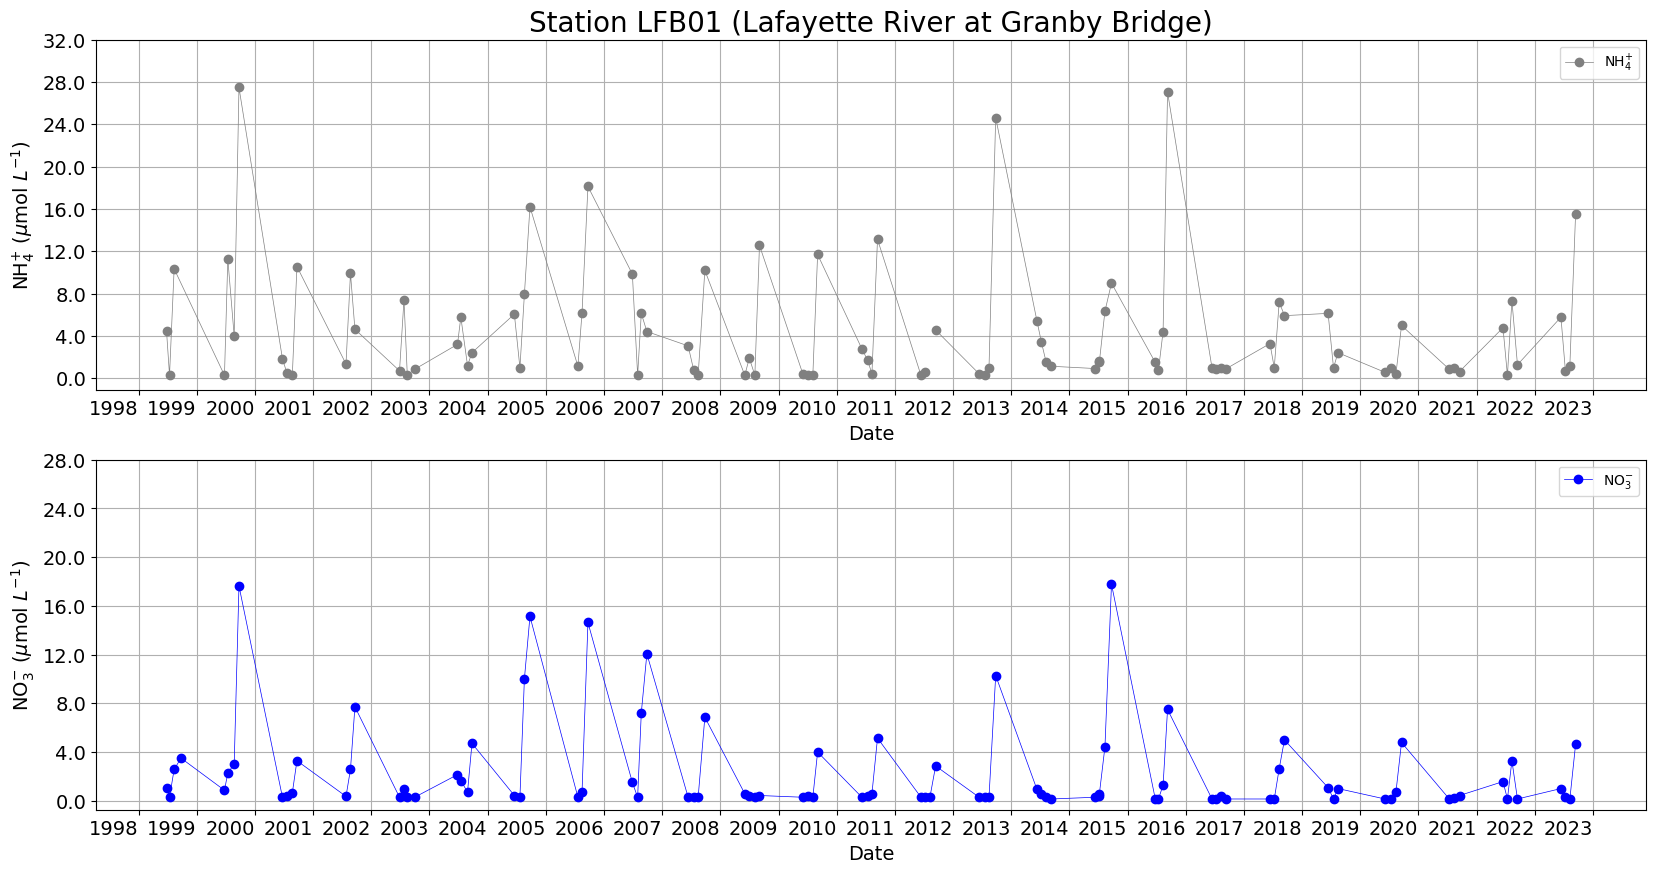

In [10]:
# plot time series data for each variable in a subplot
fig, axes = plt.subplots(2, 1, figsize=(20, 10))

# the unit of nutrient is mg N/L so it needs to be converted to umol/L
axes[0].plot(NH4_btm['DateTime'], NH4_btm['MeasureValue']*71.394, marker ='o', markersize = 6, linestyle='-', linewidth=0.5, color='grey',label ='NH$_4^{+}$')

axes[0].set_ylabel('NH$_4^{+}$ ($\mu$mol $L^{-1}$)',fontsize=14)
y_ticks = np.arange(0, 32.5, 4)
y_tick_labels = ['{:.1f}'.format(t) for t in y_ticks]
axes[0].set_yticks(y_ticks, y_tick_labels, fontsize = 14 )
date_fmt = mdates.DateFormatter('%Y')
axes[0].xaxis.set_major_formatter(date_fmt)
axes[0].xaxis.set_minor_formatter(date_fmt)
# Set the x-axis tick locator to show ticks on the 1st day and 15th day of each month
year_locator = mdates.YearLocator()
month_locator = mdates.MonthLocator()

axes[0].xaxis.set_major_locator(year_locator)
#axes[0].xaxis.set_minor_locator(month_locator)
# Set the tick parameters for both the major ticks
plt.setp(axes[0].get_xticklabels(which='major'), rotation=0, ha='right', fontsize=14)
axes[0].set_xlabel('Date',fontsize=14)
axes[0].grid(True)
axes[0].legend()
axes[0].set_title('Station LFB01 (Lafayette River at Granby Bridge)',fontsize=20)

axes[1].plot(NO3_btm['DateTime'], NO3_btm['MeasureValue']*71.394, marker ='o', markersize = 6, linestyle='-', linewidth=0.5, color='blue', label='NO$_3^{-}$')

axes[1].set_xlabel('Date',fontsize=14)
axes[1].set_ylabel('NO$_3^{-}$ ($\mu$mol $L^{-1}$)',fontsize=14)
y_ticks = np.arange(0, 28.1, 4)
y_tick_labels = ['{:.1f}'.format(t) for t in y_ticks]
axes[1].set_yticks(y_ticks, y_tick_labels, fontsize = 14 )
axes[1].xaxis.set_major_formatter(date_fmt)
axes[1].xaxis.set_major_locator(year_locator)
axes[1].set_xlabel('Date',fontsize=14)
plt.setp(axes[1].get_xticklabels(which='major'), rotation=0, ha='right', fontsize=14)
axes[1].grid(True)
axes[1].legend()
# show plot
plt.show()

### Plot Station LE5.6, total depth is ~16 m

In [11]:
data_LE56 = data[data['Station'] == 'LE5.6']
data_btm = data_LE56[(data_LE56['Layer'] == 'B ')]
# extract rows corresponding to June, July, August, and September
data_btm = data_btm[(data_btm['DateTime'].dt.month >= 6) & (data_btm['DateTime'].dt.month <= 9)]
NH4_btm = data_btm[data_btm['Parameter'] == 'NH4F']
NO3_btm = data_btm[data_btm['Parameter'] == 'NO23F']
NH4_btm  = NH4_btm.sort_values(by='DateTime')
NO3_btm  = NO3_btm.sort_values(by='DateTime')

In [12]:
# the unit of nutrient is mg N/L so it needs to be converted to umol/L
mean_NH4_btm = 71.394* NH4_btm['MeasureValue'].mean()
std_NH4_btm = 71.394* NH4_btm['MeasureValue'].std()
print('The average of bottom NH4 concentration at LFA01 over last 25 years was:', mean_NH4_btm)
print('The std was:', std_NH4_btm)

The average of bottom NH4 concentration at LFA01 over last 25 years was: 9.20683343712575
The std was: 5.958903490411347


In [13]:
mean_NO3_btm = 71.394* NO3_btm['MeasureValue'].mean()
std_NO3_btm = 71.394* NO3_btm['MeasureValue'].std()
print('The average of bottom NO3 concentration at LFA01 over last 25 years was:', mean_NO3_btm)
print('The std was:', std_NO3_btm)

The average of bottom NO3 concentration at LFA01 over last 25 years was: 5.030316760975611
The std was: 5.254767337884916


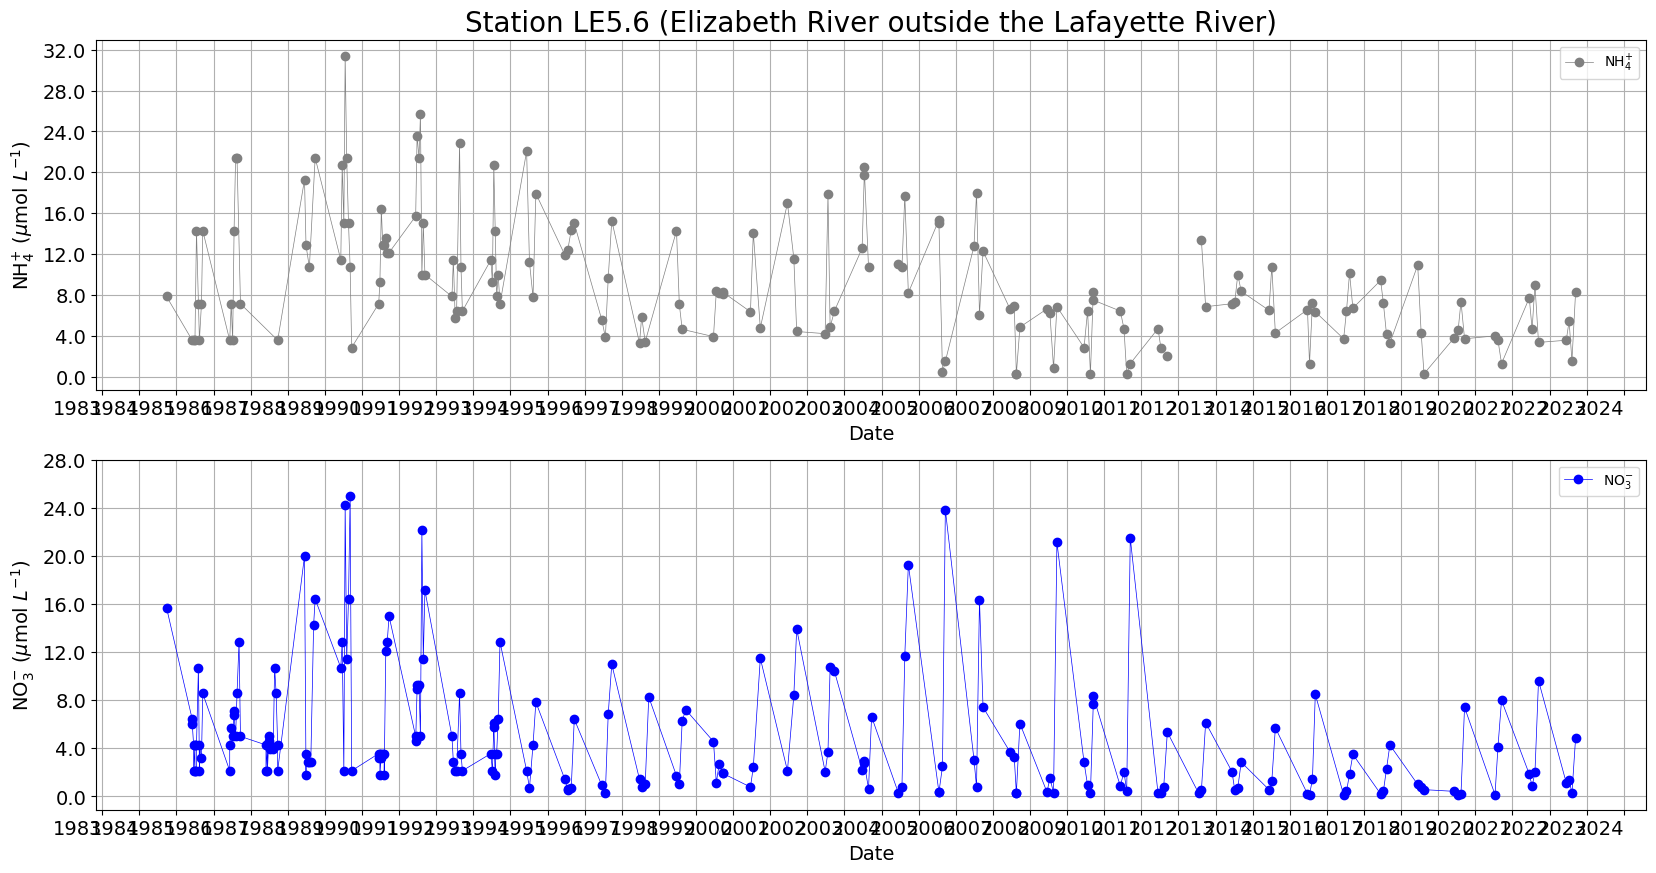

In [14]:
# plot time series data for each variable in a subplot
fig, axes = plt.subplots(2, 1, figsize=(20, 10))

# the unit of nutrient is mg N/L so it needs to be converted to umol/L
axes[0].plot(NH4_btm['DateTime'], NH4_btm['MeasureValue']*71.394, marker ='o', markersize = 6, linestyle='-', linewidth=0.5, color='grey',label ='NH$_4^{+}$')

axes[0].set_ylabel('NH$_4^{+}$ ($\mu$mol $L^{-1}$)',fontsize=14)
y_ticks = np.arange(0, 32.5, 4)
y_tick_labels = ['{:.1f}'.format(t) for t in y_ticks]
axes[0].set_yticks(y_ticks, y_tick_labels, fontsize = 14 )
date_fmt = mdates.DateFormatter('%Y')
axes[0].xaxis.set_major_formatter(date_fmt)
axes[0].xaxis.set_minor_formatter(date_fmt)
# Set the x-axis tick locator to show ticks on the 1st day and 15th day of each month
year_locator = mdates.YearLocator()
month_locator = mdates.MonthLocator()

axes[0].xaxis.set_major_locator(year_locator)
#axes[0].xaxis.set_minor_locator(month_locator)
# Set the tick parameters for both the major ticks
plt.setp(axes[0].get_xticklabels(which='major'), rotation=0, ha='right', fontsize=14)
axes[0].set_xlabel('Date',fontsize=14)
axes[0].grid(True)
axes[0].legend()
axes[0].set_title('Station LE5.6 (Elizabeth River outside the Lafayette River)',fontsize=20)


axes[1].plot(NO3_btm['DateTime'], NO3_btm['MeasureValue']*71.394, marker ='o', markersize = 6, linestyle='-', linewidth=0.5, color='blue', label='NO$_3^{-}$')
axes[1].set_xlabel('Date',fontsize=14)
axes[1].set_ylabel('NO$_3^{-}$ ($\mu$mol $L^{-1}$)',fontsize=14)
y_ticks = np.arange(0, 28.1, 4)
y_tick_labels = ['{:.1f}'.format(t) for t in y_ticks]
axes[1].set_yticks(y_ticks, y_tick_labels, fontsize = 14 )
axes[1].xaxis.set_major_formatter(date_fmt)
axes[1].xaxis.set_major_locator(year_locator)
axes[1].set_xlabel('Date',fontsize=14)
plt.setp(axes[1].get_xticklabels(which='major'), rotation=0, ha='right', fontsize=14)
axes[1].grid(True)
axes[1].legend()
# show plot
plt.show()

### Plot Station ELD01, total depth is ~7 m

In [15]:
data_ELD01 = data[data['Station'] == 'ELD01']
data_btm = data_ELD01[(data_ELD01['Layer'] == 'B ')]
# extract rows corresponding to June, July, August, and September
data_btm = data_btm[(data_btm['DateTime'].dt.month >= 6) & (data_btm['DateTime'].dt.month <= 9)]
NH4_btm = data_btm[data_btm['Parameter'] == 'NH4F']
NO3_btm = data_btm[data_btm['Parameter'] == 'NO23F']
NH4_btm  = NH4_btm.sort_values(by='DateTime')
NO3_btm  = NO3_btm.sort_values(by='DateTime')

In [16]:
# the unit of nutrient is mg N/L so it needs to be converted to umol/L
mean_NH4_btm = 71.394* NH4_btm['MeasureValue'].mean()
std_NH4_btm = 71.394* NH4_btm['MeasureValue'].std()
print('The average of bottom NH4 concentration at LFA01 over last 25 years was:', mean_NH4_btm)
print('The std was:', std_NH4_btm)

The average of bottom NH4 concentration at LFA01 over last 25 years was: 5.821649042553192
The std was: 5.285693548895021


In [17]:
mean_NO3_btm = 71.394* NO3_btm['MeasureValue'].mean()
std_NO3_btm = 71.394* NO3_btm['MeasureValue'].std()
print('The average of bottom NO3 concentration at LFA01 over last 25 years was:', mean_NO3_btm)
print('The std was:', std_NO3_btm)

The average of bottom NO3 concentration at LFA01 over last 25 years was: 7.634005855670104
The std was: 7.802783975776692


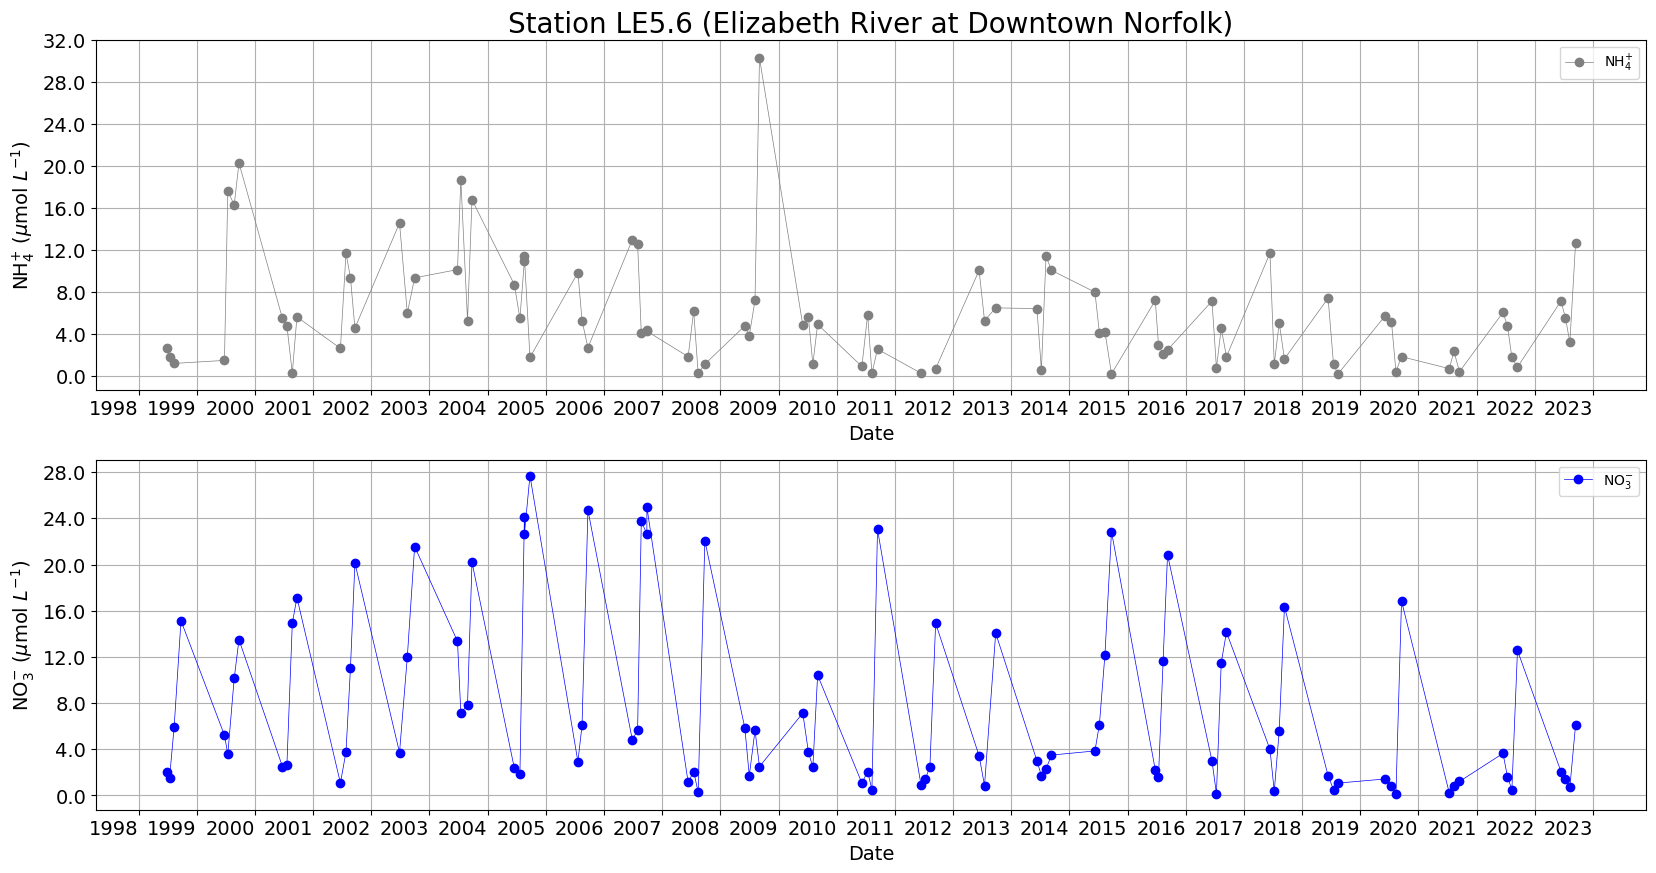

In [18]:
# plot time series data for each variable in a subplot
fig, axes = plt.subplots(2, 1, figsize=(20, 10))


axes[0].plot(NH4_btm['DateTime'], NH4_btm['MeasureValue']*71.394, marker ='o', markersize = 6, linestyle='-', linewidth=0.5, color='grey',label ='NH$_4^{+}$')
axes[0].set_ylabel('NH$_4^{+}$ ($\mu$mol $L^{-1}$)',fontsize=14)
y_ticks = np.arange(0, np.ceil(np.max(NH4_btm['MeasureValue']*71.394)+2),4)
y_tick_labels = ['{:.1f}'.format(t) for t in y_ticks]
axes[0].set_yticks(y_ticks, y_tick_labels, fontsize = 14 )
date_fmt = mdates.DateFormatter('%Y')
axes[0].xaxis.set_major_formatter(date_fmt)
axes[0].xaxis.set_minor_formatter(date_fmt)
# Set the x-axis tick locator to show ticks on the 1st day and 15th day of each month
year_locator = mdates.YearLocator()
month_locator = mdates.MonthLocator()

axes[0].xaxis.set_major_locator(year_locator)
#axes[0].xaxis.set_minor_locator(month_locator)
# Set the tick parameters for both the major and minor ticks
plt.setp(axes[0].get_xticklabels(which='major'), rotation=0, ha='right', fontsize=14)
axes[0].set_xlabel('Date',fontsize=14)
axes[0].grid(True)
axes[0].legend()
axes[0].set_title('Station LE5.6 (Elizabeth River at Downtown Norfolk)',fontsize=20)

axes[1].plot(NO3_btm['DateTime'], NO3_btm['MeasureValue']*71.394, marker ='o', markersize = 6, linestyle='-', linewidth=0.5, color='blue', label='NO$_3^{-}$')

axes[1].set_xlabel('Date',fontsize=14)
axes[1].set_ylabel('NO$_3^{-}$ ($\mu$mol $L^{-1}$)',fontsize=14)
y_ticks = np.arange(0, np.ceil(np.max(NO3_btm['MeasureValue']*71.394)+2), 4)
y_tick_labels = ['{:.1f}'.format(t) for t in y_ticks]
axes[1].set_yticks(y_ticks, y_tick_labels, fontsize = 14 )
axes[1].xaxis.set_major_formatter(date_fmt)
axes[1].xaxis.set_major_locator(year_locator)
axes[1].set_xlabel('Date',fontsize=14)
plt.setp(axes[1].get_xticklabels(which='major'), rotation=0, ha='right', fontsize=14)
axes[1].grid(True)
axes[1].legend()
# show plot
plt.show()